In [1]:
import numpy as np
import orix
import matplotlib.pyplot as plt

In [2]:
from diffpy.structure import Atom, Lattice, Structure

from orix import plot
from orix.crystal_map import CrystalMap, Phase, PhaseList
from orix.io import load, save
from orix.quaternion import Orientation, Rotation, symmetry
from orix.vector import Vector3d

In [3]:
%matplotlib inline

In [4]:
dataPath = '/Users/paytone/Documents/GitHub/maxflow_for_matsci/Data/'
fileName = 'steel_ebsd.ang'
target = dataPath + fileName

# xmap = load(dataPath + fileName)


In [5]:
euler1, euler2, euler3, x, y, iq, ci, phase_id, sem, fit = np.loadtxt(target, unpack=True)

In [6]:
euler_angles = np.column_stack((euler1, euler2, euler3))
rotations = Rotation.from_euler(euler_angles)
properties = dict(iq=iq, dp=ci)

In [7]:
# Create unit cells of the phases
structures = [
    Structure(
        title="ferrite",
        atoms=[Atom("fe", [0] * 3)],
        lattice=Lattice(0.287, 0.287, 0.287, 90, 90, 90)
    ),
]
phase_list = PhaseList(
    names=["ferrite"],
    point_groups=["4/mmm"],
    structures=structures,
)

# Create a CrystalMap instance
xmap2 = CrystalMap(
    rotations=rotations,
    phase_id=phase_id,
    x=x,
    y=y,
    phase_list=phase_list,
    prop=properties,
)
xmap2.scan_unit = "um"

xmap2

Phase    Orientations         Name  Space group  Point group  Proper point group     Color
   -1      301 (0.3%)  not_indexed         None         None                None         w
    0   92724 (99.7%)      ferrite         None        4/mmm                 422  tab:blue
Properties: iq, dp
Scan unit: um

Phase    Orientations         Name  Space group  Point group  Proper point group     Color
   -1      301 (0.3%)  not_indexed         None         None                None         w
    0   92724 (99.7%)      ferrite         None        4/mmm                 422  tab:blue
Properties: iq, dp
Scan unit: um

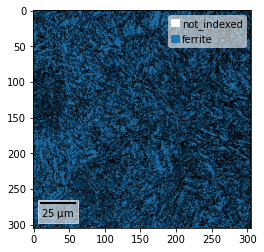

In [8]:
xmap2.plot(overlay='dp')  # Dot product values added to the alpha (RGBA) channel
xmap2

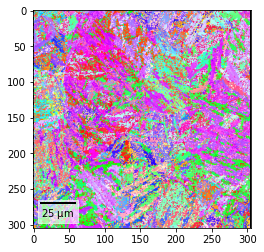

In [9]:
ckey_m3m = plot.IPFColorKeyTSL(xmap2.phases["ferrite"].point_group, direction=Vector3d.zvector())
rgb_fe = ckey_m3m.orientation2color(xmap2["ferrite"].orientations)
xmap2["ferrite"].plot(rgb_fe)

In [10]:
ori = xmap2['ferrite'].orientations

In [11]:
xferrite = xmap2['ferrite'].x
yferrite = xmap2['ferrite'].y


In [12]:
x

array([  0.   ,   0.5  ,   1.001, ..., 151.099, 151.599, 152.099])

In [13]:
y

array([  0.     ,   0.     ,   0.     , ..., 151.76175, 151.76175,
       151.76175])

In [14]:
'''
import PyMaxFlow

# Create a graph with integer capacities, with 2 non-terminal nodes and 2 non-terminal edges.
# Note that these numbers are just indicative (read below)
g = maxflow.Graph[int](2, 2)
# Add two (non-terminal) nodes. Get the index to the first one.
nodes = g.add_nodes(2)
# Create the non-terminal edges (forwards and backwards) with the given capacities between nodes 0 and 1.
g.add_edge(nodes[0], nodes[1], 1, 2)
# Set the capacities of the terminal edges...
# ...for the first node
g.add_tedge(nodes[0], 2, 5)
# ...for the second node
g.add_tedge(nodes[1], 9, 4)
'''

'\nimport PyMaxFlow\n\n# Create a graph with integer capacities, with 2 non-terminal nodes and 2 non-terminal edges.\n# Note that these numbers are just indicative (read below)\ng = maxflow.Graph[int](2, 2)\n# Add two (non-terminal) nodes. Get the index to the first one.\nnodes = g.add_nodes(2)\n# Create the non-terminal edges (forwards and backwards) with the given capacities between nodes 0 and 1.\ng.add_edge(nodes[0], nodes[1], 1, 2)\n# Set the capacities of the terminal edges...\n# ...for the first node\ng.add_tedge(nodes[0], 2, 5)\n# ...for the second node\ng.add_tedge(nodes[1], 9, 4)\n'

In [15]:
from orix.utilities import utilities as util
nrows, ncols = util.scansize(x, y)
npx = util.scanpxnum(nrows, ncols)
rowlims = util.scanrowlims(x, y, nrows, ncols)
xstp, ystp = util.scanstep(x, y, nrows, ncols)
v, p = util.kernverts(x, y, nrows, ncols, xstp, ystp, rowlims, clipverts=True)
f = util.kernfaces(v, p, rowlims, nrows, ncols, npx)

In [16]:
points = np.squeeze([x,y]).T
#print(points)

In [19]:
#from pyhull.convex_hull import ConvexHull
from scipy.spatial import ConvexHull
k = ConvexHull(points)

# erase all linear dependent points
angle = np.arctan2(x[k.vertices[0:-1]]-x[k.vertices[1:]], y[k.vertices[0:-1]]-y[k.vertices[1:]])
test = np.abs(np.diff(angle))>np.spacing(1.0)
k2 = k.vertices[np.concatenate([[True], test, [True]])]
boundingX = [x[k2], y[k2]]

cellRot=0

unitCell = util.regularPoly(4,xstp,cellRot)
print(unitCell)
radius = np.mean(np.sqrt(np.sum(unitCell**2,2)));
edgeLength = np.sqrt(np.sum(np.diff(boundingX)**2,2));

# fill each line segment with nodes every 20 points (in average)
#nto = fix((edgeLength>0)*4); fix(edgeLength*(2*radius));

#cs = cumsum([1; 1 + nto]);
#boundingX(cs,:) = boundingX;


[array([0., 0., 0., 0.]), array([0.27768018, 0.83304055, 1.38840092, 1.94376129])]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [ ]:
k.vertices

#from pyhull.voronoi import VoronoiTess
#[V,D] = voronoin([X;dummyCoordinates],{'Q5','Q6','Qs'}); %,'QbB'
#v = VoronoiTess()